# Pair of numerical variables description: 2D-distribution + Scatter plot

Pair of numerical variables description with a plot for one or several columns in a dataframe. 

In [1]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## functions

In [7]:
## plot distribution of two columns
def dist2d(df:pd.DataFrame, columns:list, ax:"matplotlib axis")->"matplotlib axis":
    # validations
    assert len(columns) == 2, "it is required a pair of columns."
    for c in columns:
        assert c in df.columns.tolist(), f"column '{c}' is not available."
    # collect columns
    column1, column2 = columns
    # plot
    ax = sns.scatterplot(data=df, x=column1, y=column2, color = "red", ax = ax)
    ax = sns.kdeplot(data=df, x=column1, y=column2, ax = ax)    
    # return axis
    return ax


# plot selected columns
def plot(df:pd.DataFrame, columns:"list or str", plot_function:"function", num_plots_per_row:int = 3):
    # if columns is only one string    
    if isinstance(columns, str):
        # figsize
        figsize = (10, 10)
        # number of plots in rows / columns
        nrs = ncs = 1
    # if is a list
    elif isinstance(columns, list):
        # number of columns to be ploted
        ncolumns = len(columns)
        # number of plots in rows / columns
        nrs = math.ceil(ncolumns / num_plots_per_row)
        ncs = num_plots_per_row if ncolumns >= num_plots_per_row else ncolumns 
        # figsize
        figsize = (ncs*5, nrs*5)    
    else:
        raise
    # create figure and axis    
    fig, ax = plt.subplots(ncols = ncs, nrows = nrs, figsize = figsize)
    # if axis is an array
    if isinstance(ax, np.ndarray):
        # reshape
        ax = ax.ravel()
        # loop of axis
        for ii, c in enumerate(columns):
            # plot in cells
            _ = plot_function(df, c, ax[ii])
    # if axis is only one
    else:
        # plots only one
        _ = plot_function(df, columns[0] if len(columns) == 1 else columns, ax)
    # display plot
    plt.show()

## data

In [8]:
""" tips """

# load data
tips = sns.load_dataset("tips")
# get numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_num_tips = tips.select_dtypes(include=numerics).columns.tolist()


""" iris """

# load data

iris = sns.load_dataset("iris")
# get numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_num_iris = iris.select_dtypes(include=numerics).columns.tolist()

## plots

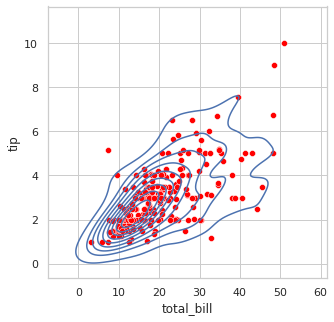

In [10]:
# plot only one column
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (5, 5))
ax = dist2d(tips, cols_num_tips[:2], ax)
plt.show()

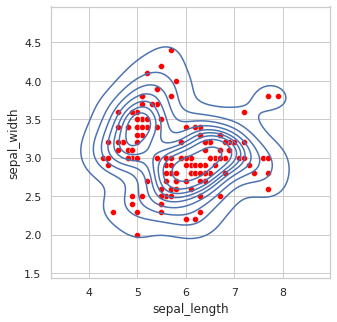

In [12]:
# plot only one column
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (5, 5))
ax = dist2d(iris, cols_num_iris[:2], ax)
plt.show()

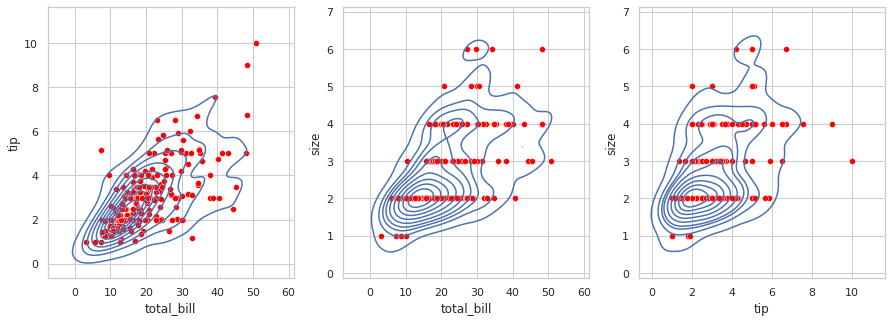

In [21]:
# plot several columns
import itertools
comb_cols_num_tips = list(itertools.combinations(cols_num_tips, r=2))
df = tips.copy()
plot_function = dist2d
plot(df, comb_cols_num_tips, plot_function, num_plots_per_row = 3)

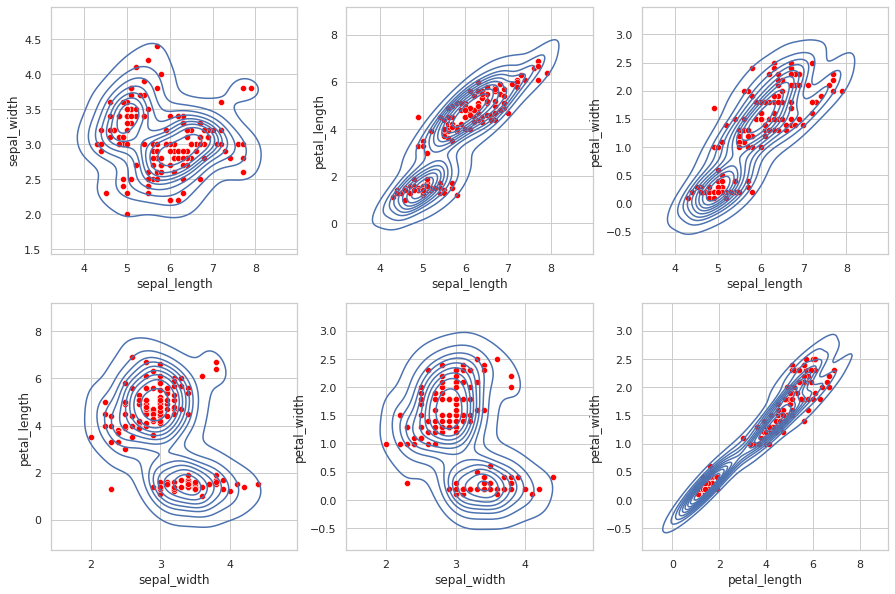

In [20]:
# plot several columns
import itertools
comb_cols_num_iris = list(itertools.combinations(cols_num_iris,r=2))
df = iris.copy()
plot_function = dist2d
plot(df, comb_cols_num_iris, plot_function, num_plots_per_row = 3)